In [35]:
import random

In [59]:
#listen to notes and record them here
#Reset the 'streams'
recorded_stream = [70,64, 55, 64, 55,57, 64, 55,57, 64, 69, 66, 69, 64, 55 ,56, 57, 64, 71]
recorded_stream = [70,64, 55, 64, 55,57, 64] #test with smaller array

model_stream = []

In [60]:
def make_markov_model(recorded_stream, n_gram):
    markov_model = {}
    for i in range(len(recorded_stream)-(n_gram)-1):
        curr_state, next_state = [],[]
        for j in range(n_gram):
            curr_state.append(recorded_stream[i+j])            
            ref = i+j
            next_state.append(recorded_stream[ref+2])
        curr_state = tuple(curr_state)
        next_state = tuple(next_state)
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    #Calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
    
    return markov_model
    

In [61]:
#Test the model
markov_model=make_markov_model(recorded_stream, n_gram = 2)
print("Number of states =", len(markov_model))
print(markov_model)
#print(recorded_stream)


Number of states = 3
{(70, 64): {(55, 64): 1.0}, (64, 55): {(64, 55): 0.5, (57, 64): 0.5}, (55, 64): {(55, 57): 1.0}}


In [42]:
n_gram = 2


(55, 57) 
 {(64, 59): 1.0}


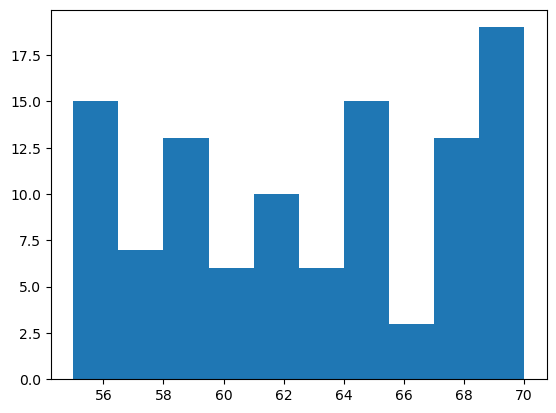

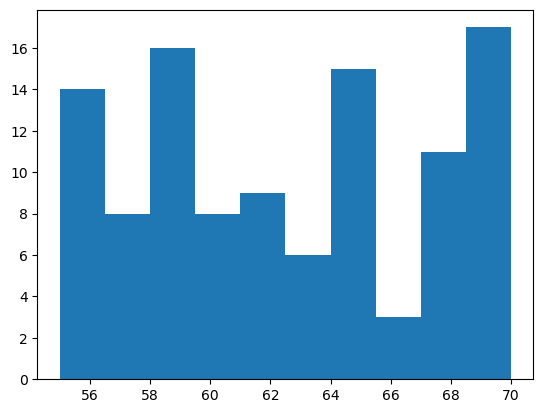

In [96]:
from operator import itemgetter
import random
n=0 #init counter
#Change n_gram for better 'context' maybe keep low for a small dataset
n_gram = 2 
model_stream = []
recorded_stream = [70,64, 55, 64, 55,57, 64] 
model_stream.extend(recorded_stream)
markov_model = make_markov_model(recorded_stream, n_gram)  

while n < 100: #loop to simulate someone playing in 100 notes
    
    note = random.randint(min(recorded_stream), max(recorded_stream)) # random note generation within the played freq range
    #Find the last n_gram notes played
    if n_gram == 1:
        lastX = tuple([note])
    else :
        rec = recorded_stream[-(n_gram-1):]
        rec.append(note)       
        lastX = tuple(rec)  #Get the last
    rand = random.uniform(0,1)
    
    if lastX in markov_model: #Random selection based on probability of the options in the model        
        selec = 0
        options = itemgetter(lastX)(markov_model)
        for key, value in options.items():
            if selec<rand:    #random selection of next note
                next = key[1] #add the model produced note                
            selec += value
    else:
        next = note #Add the note played
    
    
    recorded_stream.append(note)#update list of played notes
    model_stream.append(next)#update list of model produced notes
    markov_model = make_markov_model(recorded_stream, n_gram)  
    n+=1    

#Just an example with random inputs and see what probabilities on output we get
randSelect = random.randint(0,len(recorded_stream))
enter = tuple(recorded_stream[randSelect:randSelect+n_gram]) #enter an input from the recorded stream

print(enter,'\n',markov_model[enter]) #see probs of what could come next
#print(len(recorded_stream) - len(model_stream))

import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(model_stream)
plt.show()

n, bins, patches = plt.hist(recorded_stream)
plt.show()

In [83]:
print(recorded_stream, '\n',model_stream)

[70, 64, 55, 64, 55, 57, 64, 55, 60, 68, 64, 63, 63, 66, 56, 58, 63, 61, 61, 69, 68, 57, 66, 61, 56, 70, 66, 58, 66, 65, 69, 67, 59, 62, 57, 68, 67, 56, 57, 57, 65, 68, 65, 59, 66, 69, 69, 66, 56, 69, 67, 62, 59, 63, 59, 55, 62, 64, 59, 67, 56, 65, 55, 56, 69, 57, 58, 62, 57, 70, 64, 66, 70, 69, 61, 56, 69, 63, 63, 59, 64, 55, 67, 58, 62, 64, 67, 59, 56, 55, 61, 62, 65, 60, 63, 68, 67, 62, 64, 57, 57, 55, 64, 66, 70, 65, 63] 
 [70, 64, 55, 64, 55, 57, 64, 64, 60, 68, 64, 63, 63, 66, 56, 58, 63, 61, 61, 69, 68, 57, 66, 61, 56, 70, 66, 58, 66, 65, 69, 67, 59, 62, 57, 68, 67, 56, 57, 57, 65, 68, 65, 59, 66, 69, 69, 66, 63, 69, 62, 62, 59, 63, 59, 55, 62, 64, 59, 67, 57, 65, 55, 56, 62, 57, 58, 62, 67, 70, 64, 66, 70, 69, 61, 66, 58, 63, 56, 62, 64, 68, 67, 58, 70, 67, 67, 57, 56, 55, 61, 62, 65, 60, 63, 68, 57, 63, 59, 57, 68, 55, 57, 69, 61, 65, 63]
